# seaborn 시각화 패키지 소개

seaborn은 matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지이다. 당연히 matplotlib 패키지에 의존하며 통계 기능의 경우에는 statsmodels 패키지에 의존한다.

seaborn에서 제공하는 플롯의 종류는 다음과 같다.

* 분포 플롯 (distribution plot)
* 회귀 분석 플롯 (regression plot)
* 카테고리 플롯 (categorical plot)
* 행렬 플롯 (matrix plot)
* 시계열 플롯 (time series plot)

seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.

* http://stanford.edu/~mwaskom/software/seaborn/index.html

## 색상 테마

seaborn을 임포트하게 되면 바탕화면, axis, 색상 팔레트 등을 matplotlib에서 제공하는 기본 스타일이 아닌 seaborn에서 지정한 디폴트 스타일 집합으로 변경한다. 따라서 동일한 matplotlib 명령을 수행해도 seaborn을 임포트 한 것과 하지 않은 플롯은 다음과 같이 스타일 차이가 난다.

<img src="https://datascienceschool.net/upfiles/1c0306b736904f3d8dbed00e646565cd.png" style="width: 70%; margin-left: 0px;">

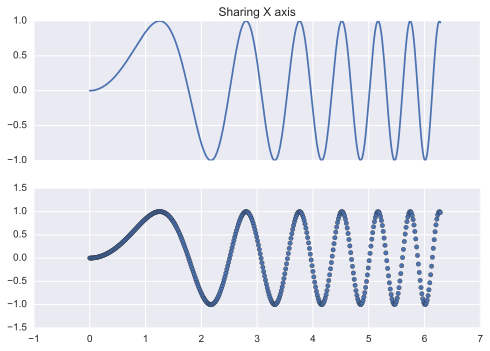

In [2]:
import seaborn as sns
sns.set()
sns.set_color_codes()

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y);

## 분포 플롯

분포 플롯은 자료의 분포를 묘사하기 위한 것으로 matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공한다. 분포 플롯 명령에는 다음과 같은 것들이 있다.

* `rugplot`
* `kdeplot`
* `distplot`
* `jointplot`
* `pairplot`

러그(rug) 데이터 위치를 x축 위에 작은 선분으로 나타내어 실제 데이터 분포를 보여준다.

In [9]:
np.random.seed(0)
x = np.random.randn(100)

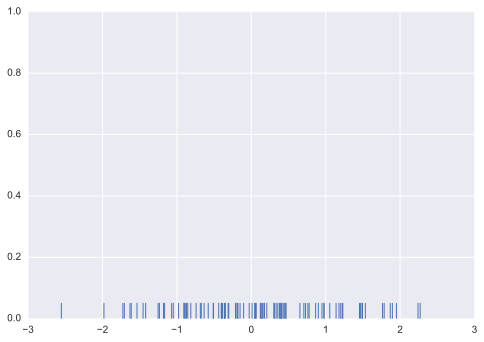

In [11]:
sns.rugplot(x);

커널 밀도(kernel density)는 커널이라고 하는 단위 플롯을 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다. 커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.

* http://scikit-learn.org/stable/modules/density.html

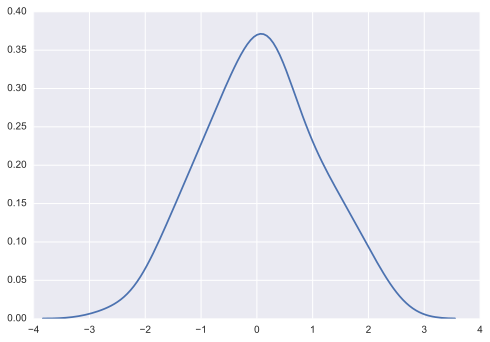

In [13]:
sns.kdeplot(x);

seaborn의 `distplot` 명령은 matplotlib의 히스토그램 명령을 대체하여 많이 쓰인다. 러그와 커널 밀도 기능을 가지고 있다.

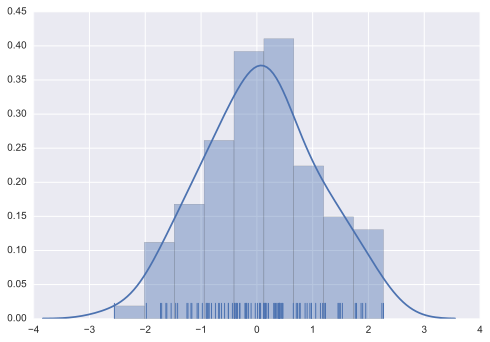

In [15]:
sns.distplot(x, kde=True, rug=True);

두 개 이상의 데이터 집합에 대한 분포를 시각화 할 때는 `jointplot`을 사용한다. 두 데이터 집합의 관계는 스캐터 플롯, 컨투어 플롯으로 볼 수 있으며 각 개별 데이터에 대한 히스토그램도 추가적으로 보여준다.

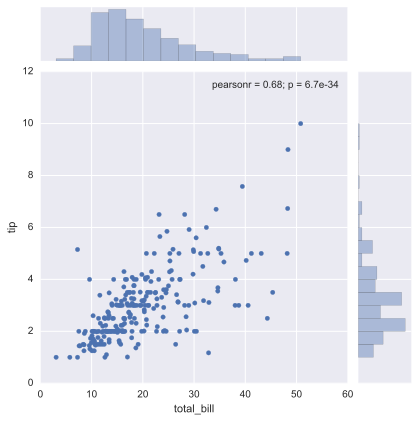

In [19]:
tips = sns.load_dataset("tips")
sns.jointplot(x="total_bill", y="tip", data=tips);

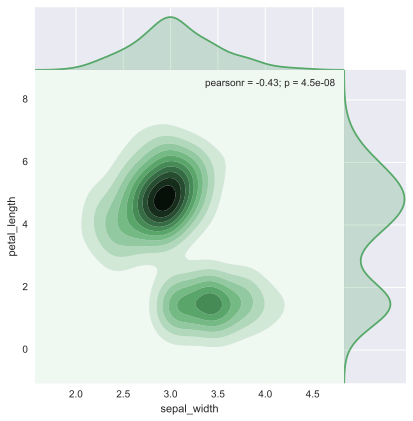

In [20]:
iris = sns.load_dataset("iris")
sns.jointplot("sepal_width", "petal_length", data=iris, kind="kde", space=0, color="g")

## 회귀 분석 플롯

회귀 분석 플롯은 선형 회귀 분석 결과를 묘사하기 위한 것이다. 회귀 분석 플롯 명령에는 다음과 같은 것들이 있다.

* `regplot`
* `residplot`
* `lmplot`

`regplot` 명령은 내부적으로 회귀 분석을 실시하고 그 결과를 시각화한다. 데이터 자체는 스케터 플롯으로, 회귀 분석 결과는 라인플롯으로, 신뢰구간은 fill 플롯으로 그린다.

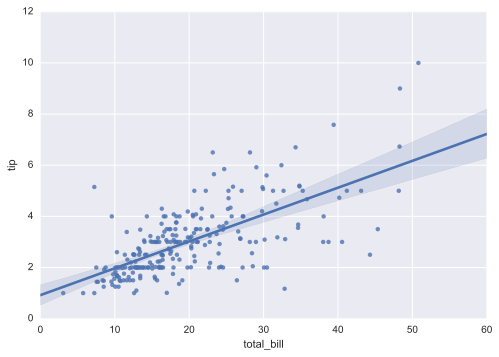

In [21]:
sns.regplot(x="total_bill", y="tip", data=tips);

`residplot`은 잔차항(residual)를 스캐터 플롯으로 그린다.

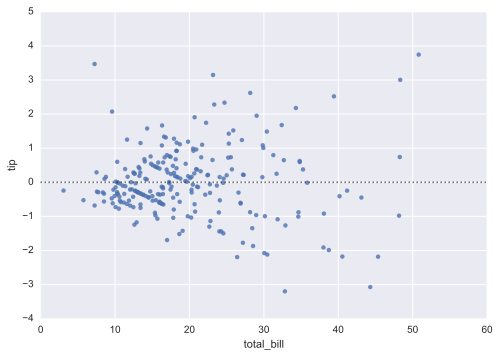

In [29]:
sns.residplot(x="total_bill", y="tip", data=tips);

`lmplot` 명령을 사용하면 여러가지 회귀 분석 결과를 하나의 그림에 보일 수 있다.

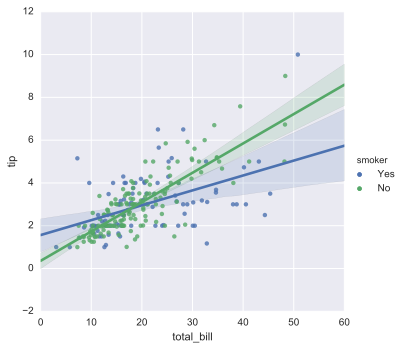

In [31]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

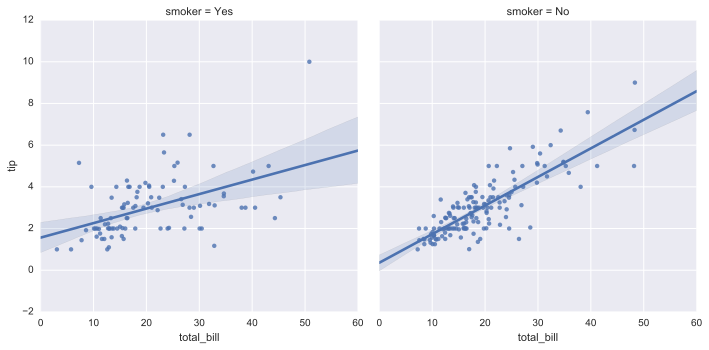

In [32]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips);

## 카테고리 플롯

카테고리 플롯은 1차원 카테고리 값 자료의 분포를 묘사하기 위한 것이다. 카테고리 플롯 명령에는 다음과 같은 것들이 있다.

* `barplot`
* `countplot`
* `boxplot`
* `pointplot`
* `violinplot`
* `stripplot`
* `swarmplot`


`barplot` 은 기본적인 바 차트를 생성한다.

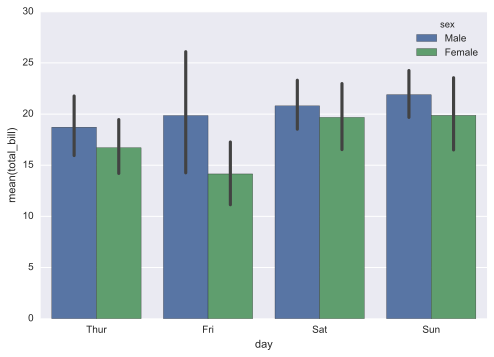

In [34]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips);

`countplot`은 카테고리이 다른 데이터 갯수를 시각화한다.

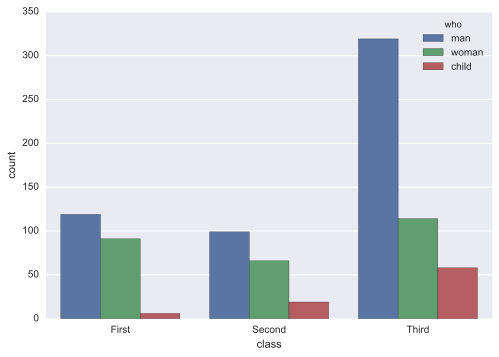

In [37]:
titanic = sns.load_dataset("titanic")
sns.countplot(x="class", hue="who", data=titanic);

`boxplot`과 `pointplot`은 카테고리 인자에 따라 분포의 특성이 어떻게 바뀌는지를 보여준다.

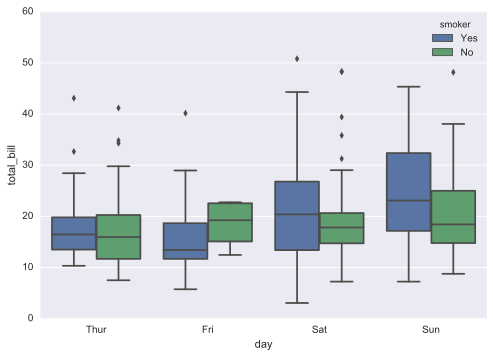

In [41]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips);

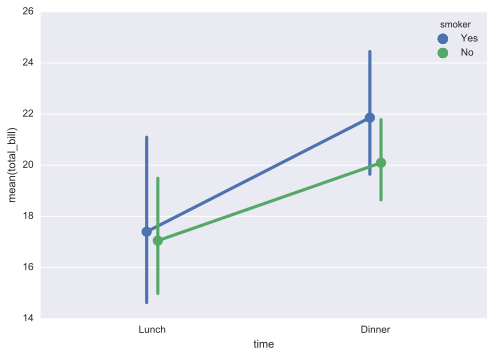

In [39]:
sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, dodge=True);

`boxplot`과 `pointplot`이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 `violinplot`, `stripplot`. `swarmplot` 등은 카테고리값에 따른 각 분포의 전체 형상을 보여준다는 장점이 있다. `stripplot` 과 `swarmplot` 은 보통 `boxplot`이나 `violinplot`과 같이 사용된다.

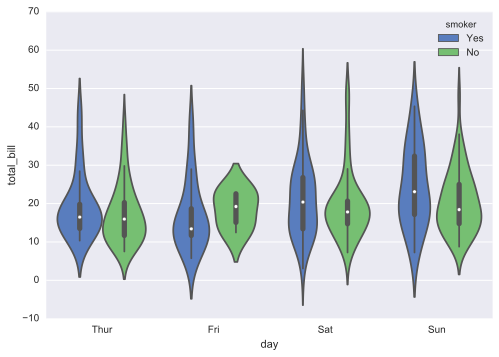

In [43]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted");

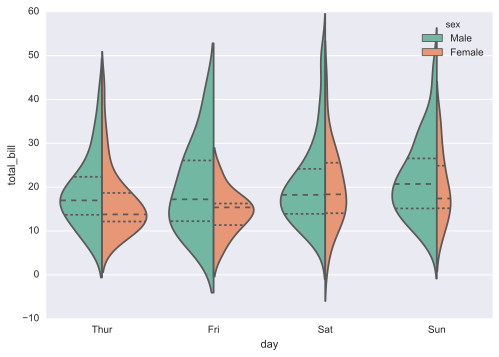

In [44]:
sns.violinplot(x="day", y="total_bill", hue="sex",
               data=tips, palette="Set2", split=True,
               scale="count", inner="quartile");

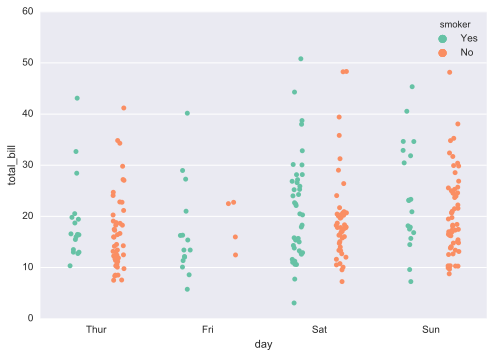

In [46]:
sns.stripplot(x="day", y="total_bill", hue="smoker",
              data=tips, jitter=True,
              palette="Set2", split=True);

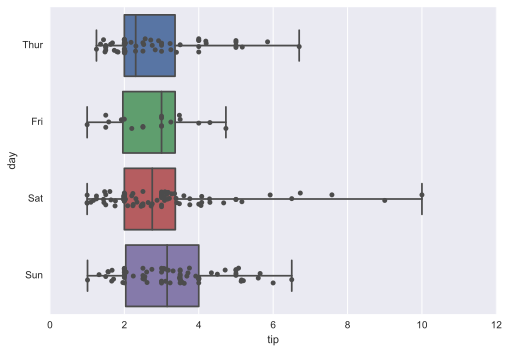

In [48]:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color=".3");

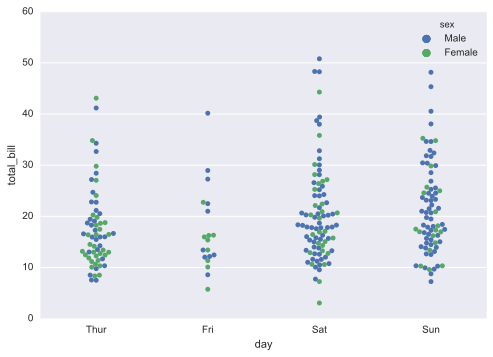

In [50]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

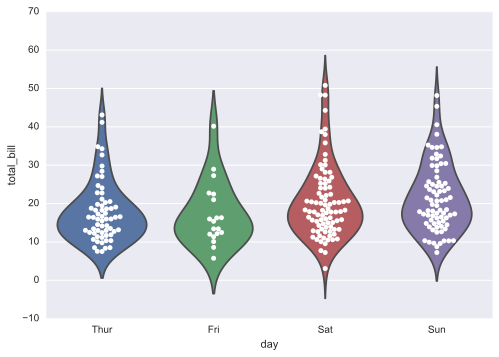

In [52]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="white", edgecolor="gray");

## 행렬 플롯

행렬 플롯은 2차원 카테고리 값 자료의 분포를 묘사하기 위한 것이다. 행렬 플롯 명령에는 다음과 같은 것들이 있다.

* `heatmap`
* `clustermap`

`heatmap` 명령은 카테고리 값에 따른 자료의 수를 세고 이를 matplotlib 패키지의 `imshow`와 유사한 형태로 보여준다.

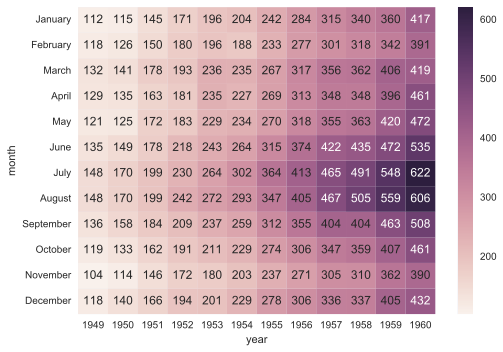

In [54]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights, annot=True, fmt="d");

`clustermap` 명령은 히트맵에 계층 클러스터링(hierarchical clustering) 결과를 덴드로그램(dendrogram)으로 추가한다. 

계층 클러스터링에 대해서는 다음 웹사이트를 참조한다.

* http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

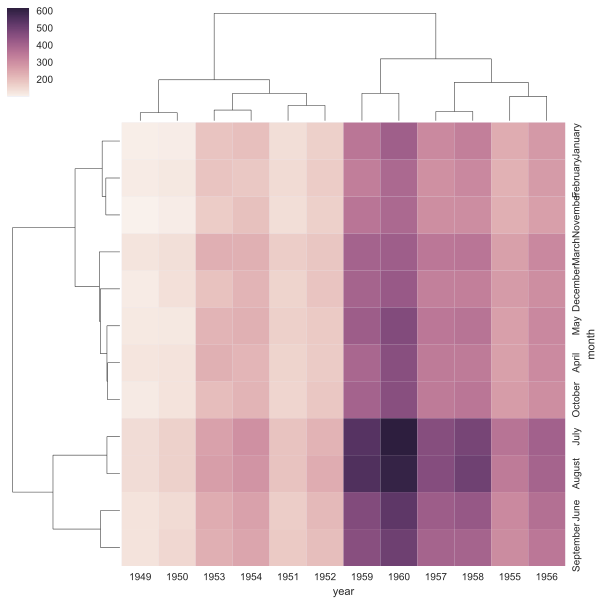

In [56]:
sns.clustermap(flights);

## 시계열 플롯

시계열 플롯은 시계열 자료를 묘사하기 위한 것이다. matplotlib의 단순한 라인 플롯에 불확정 범위를 표시하는 기능 등을 추가하였으며 주로 같은 시계열 모형에서 샘플링 된 복수개의 시계열을 묘사하는데 사용된다.
 
* `tsplot`

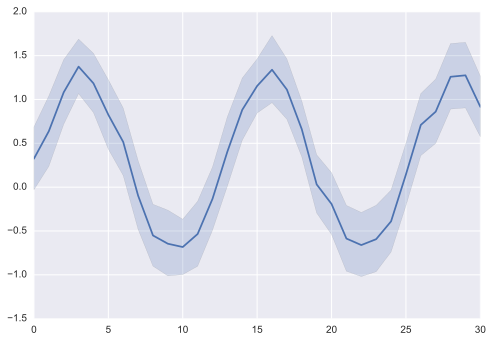

In [58]:
np.random.seed(22)
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
sns.tsplot(data=data);

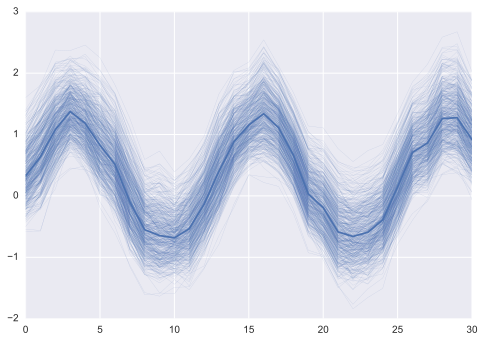

In [60]:
sns.tsplot(data=data, err_style="boot_traces", n_boot=500);

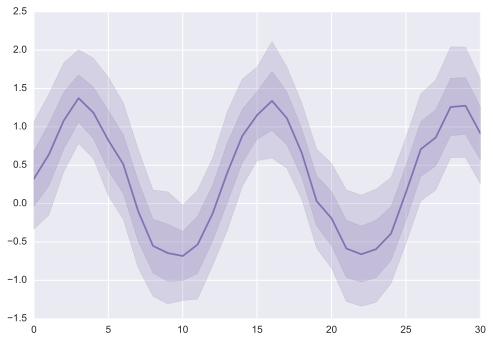

In [62]:
sns.tsplot(data=data, ci=[68, 95], color="m");